# 單回歸分析

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

bike = pd.read_csv("gongguan.csv")
print(bike.head())

lm = LinearRegression()

# 使用降雨量來做分析
lent = bike["lent"].values.reshape(-1, 1)
pre = bike["precipitation"].values.reshape(-1, 1)

lm.fit(pre, lent)  # train the model

print("降雨量")
print("Coefficients: ", lm.coef_)
print("Intercept:    ", lm.intercept_)
print("R Square:     ", lm.score(pre, lent))

# 使用氣溫來做分析
temp = bike["temperature"].values.reshape(-1, 1)

lm.fit(temp, lent)

print("溫度")
print("Coefficients: ", lm.coef_)
print("Intercept:    ", lm.intercept_)
print("R Square:     ", lm.score(temp, lent))

# 氣溫較降雨量的解釋度較高

   sno      date  to_days  hour  lent  returned  weekday  workingday  \
0   45  2017/7/1        1     0    17        10        5           0   
1   45  2017/7/1        1     1     6        13        5           0   
2   45  2017/7/1        1     2     4         2        5           0   
3   45  2017/7/1        1     3     3         1        5           0   
4   45  2017/7/1        1     4     4         1        5           0   

   temperature  humidity  wind_speed  precipitation  station_pres  
0         27.9        78         1.0            0.0        1004.3  
1         27.1        79         1.4            0.0        1005.1  
2         26.9        81         1.4            0.0        1004.8  
3         26.9        79         0.4            0.0        1004.1  
4         26.8        79         2.0            0.0        1004.0  
雨量
Coefficients:  [[-0.93664091]]
Intercept:     [45.01397093]
R Square:      0.0057658829687594615
溫度
Coefficients:  [[7.12688596]]
Intercept:     [-167.26900

# 複回歸分析

In [10]:
import numpy as np

# 加入氣溫的平方
temp = bike["temperature"].values.reshape(-1, 1)
tempSq = pow(temp, 2)
X_temp = np.hstack((temp, tempSq))

lm.fit(X_temp, lent)

print("Coefficients: ", lm.coef_)
print("Intercept:    ", lm.intercept_)
print("R Square:     ", lm.score(X_temp, lent))

Coefficients:  [[61.42921917 -0.90717676]]
Intercept:     [-974.3983994]
R Square:      0.2831506383043967


In [12]:
#加入是否為工作日跟時間
working = bike["workingday"].values.reshape(-1, 1)
hourFactor = pd.get_dummies(bike["hour"])

X_full = np.hstack((hourFactor, working, temp, tempSq, pre))

lm.fit(X_full, lent)

print("Coefficients: ", lm.coef_)
print("Intercept:    ", lm.intercept_)
print("R Square:     ", lm.score(X_full, lent))

Coefficients:  [[ 7.10159627e+10  7.10159626e+10  7.10159626e+10  7.10159626e+10
   7.10159626e+10  7.10159626e+10  7.10159627e+10  7.10159627e+10
   7.10159627e+10  7.10159627e+10  7.10159627e+10  7.10159627e+10
   7.10159627e+10  7.10159627e+10  7.10159627e+10  7.10159627e+10
   7.10159627e+10  7.10159627e+10  7.10159627e+10  7.10159627e+10
   7.10159627e+10  7.10159627e+10  7.10159627e+10  7.10159627e+10
   1.10309259e+01  2.65635672e+01 -3.91296387e-01 -1.02700359e+00]]
Intercept:     [-7.10159631e+10]
R Square:      0.7902974215475654


# 用迴歸做預測

   hour  workingday  temperature  precipitation
0     0           1         29.5              0
1     1           1         28.2              0
2     2           1         28.1              0
3     3           1         27.8              0
4     4           1         27.6              0
[[ 24.86143494]
 [ 10.29573059]
 [  8.5453186 ]
 [  6.21208191]
 [  6.3828125 ]
 [ 17.00956726]
 [ 52.69906616]
 [ 69.65104675]
 [ 51.82073975]
 [ 44.15664673]
 [ 51.09002686]
 [ 72.96195984]
 [ 59.00440979]
 [ 77.21517944]
 [ 96.92079163]
 [106.5617218 ]
 [ 94.66448975]
 [ 84.86460876]
 [ 85.61154175]
 [ 59.5423584 ]
 [ 36.14804077]
 [ 11.20481873]
 [  5.45420837]
 [  1.69580078]
 [ -2.51292419]
 [ -4.15563965]
 [ -2.00645447]
 [  8.55847168]
 [ 40.83184814]
 [ 59.09640503]
 [ 41.98899841]
 [ 33.12571716]
 [ 40.39433289]
 [ 59.25035095]
 [ 61.27128601]
 [ 45.78665161]
 [ 47.46296692]
 [ 65.69612122]
 [ 85.0736084 ]
 [ 95.24232483]
 [ 84.17190552]
 [ 74.62973022]
 [ 75.59524536]
 [ 48.73783875]
 [ 23.20

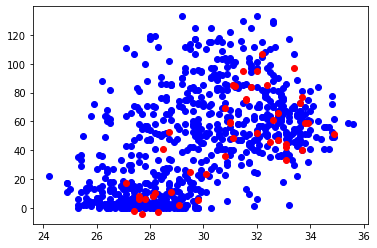

In [16]:
import matplotlib.pyplot as plt

bike_future = pd.read_csv("gongguan_future.csv")
print(bike_future.head())

hourFactor = pd.get_dummies(bike_future["hour"])
working = bike_future["workingday"].values.reshape(-1, 1)
temp = bike_future["temperature"].values.reshape(-1, 1)
tempSq = pow(temp, 2)
pre = bike_future["precipitation"].values.reshape(-1, 1)

X_future = np.hstack((hourFactor, working, temp, tempSq, pre))

lent_predict = lm.predict(X_future)

print(lent_predict)

plt.plot(bike["temperature"].values, bike["lent"].values, "bo")
plt.plot(temp, lent_predict, "ro")
plt.show()

   sno      date  to_days  hour  lent  returned  weekday  workingday  \
0   45  2017/7/1        1     0    17        10        5           0   
1   45  2017/7/1        1     1     6        13        5           0   
2   45  2017/7/1        1     2     4         2        5           0   
3   45  2017/7/1        1     3     3         1        5           0   
4   45  2017/7/1        1     4     4         1        5           0   

   temperature  humidity  wind_speed  precipitation  station_pres  
0         27.9        78         1.0            0.0        1004.3  
1         27.1        79         1.4            0.0        1005.1  
2         26.9        81         1.4            0.0        1004.8  
3         26.9        79         0.4            0.0        1004.1  
4         26.8        79         2.0            0.0        1004.0  
[[ 7.26545715e+00]
 [-6.15255737e+00]
 [-8.53633118e+00]
 [-9.46253967e+00]
 [-8.86976624e+00]
 [-6.93188477e+00]
 [ 2.62458801e+00]
 [ 3.66811981e+01]
 [ 5.29

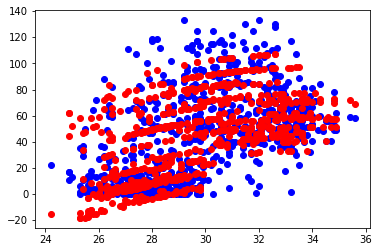

In [17]:
bike_future = pd.read_csv("gongguan.csv")
print(bike_future.head())

hourFactor = pd.get_dummies(bike_future["hour"])
working = bike_future["workingday"].values.reshape(-1, 1)
temp = bike_future["temperature"].values.reshape(-1, 1)
tempSq = pow(temp, 2)
pre = bike_future["precipitation"].values.reshape(-1, 1)

X_future = np.hstack((hourFactor, working, temp, tempSq, pre))

lent_predict = lm.predict(X_future)

print(lent_predict)

plt.plot(bike["temperature"].values, bike["lent"].values, "bo")
plt.plot(temp, lent_predict, "ro")
plt.show()